In [1]:
from IPython.display import display
from PIL import Image
import numpy as np

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [251 255 255 ...   0   1 245]
 [255 239 240 ...   0   8   3]
 [255 255 255 ... 238 249 255]]


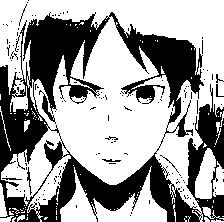

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 1]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False False  True]
 [ True  True  True ... False False False]
 [ True  True  True ...  True  True  True]]
L


In [3]:
from PIL import Image
import numpy as np

def convert_to_binary(image_path, threshold=128):
    # Ouvrir l'image avec Pillow
    img = Image.open(image_path)

    # Convertir l'image en niveaux de gris si elle est en couleur
    img_gray = img.convert('L')

    # Convertir l'image en un tableau NumPy
    img_array = np.array(img_gray)

    # Binariser l'image en utilisant un seuil
    binary_image = img_array > threshold

    return binary_image

# Chemin vers l'image que vous souhaitez binariser
image_path = "../Images/img3/eren_rgb.jpg"
print(np.array(Image.open("bin.jpg")))
# Seuil pour la binarisation (0 pour noir, 255 pour blanc)
threshold_value = 128

# Convertir l'image en binaire
binary_image = convert_to_binary(image_path, threshold_value)
display(Image.fromarray(binary_image))

# Afficher l'image binaire
print(np.array(binary_image, dtype=np.uint))
print(np.array(binary_image))
Image.fromarray(binary_image).save('bin.jpg')
print(Image.open('bin.jpg').mode)



 [[[159 187 234]
  [164 192 239]
  [171 198 243]
  ...
  [202 234 255]
  [191 225 250]
  [196 230 255]]

 [[147 175 222]
  [149 177 224]
  [153 180 227]
  ...
  [194 224 248]
  [190 220 244]
  [198 230 253]]

 [[141 172 219]
  [139 170 216]
  [138 166 213]
  ...
  [200 225 245]
  [199 224 244]
  [209 236 255]]

 ...

 [[204 187 157]
  [203 186 156]
  [207 190 160]
  ...
  [ 94  95  87]
  [114 117 110]
  [134 137 130]]

 [[222 203 173]
  [218 199 169]
  [211 192 160]
  ...
  [ 99  97  84]
  [ 49  49  37]
  [ 42  42  30]]

 [[228 209 179]
  [221 202 172]
  [220 199 168]
  ...
  [218 215 198]
  [187 185 170]
  [180 178 163]]]


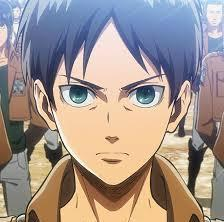

In [2]:
img_rgb = Image.open("../Images/img3/eren_rgb.jpg") # open colour image
img_rgb = np.array(img_rgb, dtype=np.uint8)
L, C, plan = img_rgb.shape
im = img_rgb
print("\n\n", im)
display(Image.fromarray(im))

In [ ]:
def vecteur_ligne(matrice):
  vecteur = np.array(matrice, dtype=np.uint8)
  vecteur = vecteur.flatten()
  return vecteur.tolist()

def inverse_vecteur_ligne(vecteur, lignes, colonnes):
    expected_size = lignes * colonnes
    actual_size = len(vecteur)
    
    if expected_size != actual_size:
        raise ValueError(f"Cannot reshape array of size {actual_size} into shape ({lignes},{colonnes})")
    
    mat = np.array(vecteur, dtype=np.uint8).reshape((lignes, colonnes))
    return mat

def vecteur_colonne(matrice):
    vecteur = np.ravel(matrice, order = 'F')
    vecteur = vecteur.tolist()
    return vecteur

def inverse_vecteur_colonne(vecteur, lignes, colonnes):
    expected_size = lignes * colonnes
    actual_size = len(vecteur)
    
    if expected_size!= actual_size:
        raise ValueError(f"Cannot reshape array of size {actual_size} into shape ({lignes},{colonnes})")
    
    mat = np.array(vecteur, dtype=np.uint8).reshape((lignes, colonnes))
    return mat

def vecteur_zigzag(matrice):
    matrice = np.array(matrice, dtype=np.uint8)
    lignes, colonnes = matrice.shape
    solution = [[] for i in range(lignes + colonnes - 1)]
    
    for i in range(lignes):
        for j in range(colonnes):
            somme = i + j
            if somme % 2 == 0:
                solution[somme].insert(0, matrice[i, j])
            else:
                solution[somme].append(matrice[i, j])
    vecteur = np.concatenate(solution)
    
    return vecteur.tolist()

def inverse_vecteur_zigzag(vector, rows, cols):
    mat = [[None] * cols for _ in range(rows)]
    row, col = 0, 0
    direction = 1

    for i in range(rows * cols):
        mat[row][col] = vector[i]
        if direction == 1:
            if col == cols - 1:
                row += 1
                direction = -1
            elif row == 0:
                col += 1
                direction = -1
            else:
                row -= 1
                col += 1
        else:
            if row == rows - 1:
                col += 1
                direction = 1
            elif col == 0:
                row += 1
                direction = 1
            else:
                row += 1
                col -= 1

    return np.array(mat, dtype=np.uint8)

def matrices_vecteur_ligne(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge = vecteur_ligne(R)
    vert = vecteur_ligne(G)
    bleu = vecteur_ligne(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return rgb.tolist()

def inverse_vecteur_ligne_matrices(decompressed, L, C):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]
    
    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, L, C)
    G_inverse = inverse_vecteur_ligne(G, L, C)
    B_inverse = inverse_vecteur_ligne(B, L, C)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim, dtype=np.uint8)

def matrices_vecteur_colonne(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge = vecteur_colonne(R)
    vert = vecteur_colonne(G)
    bleu = vecteur_colonne(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return rgb.tolist()

def inverse_vecteur_colonne_matrices(decompressed, L, C):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]

    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_colonne(R, L, C)
    G_inverse = inverse_vecteur_colonne(G, L, C)
    B_inverse = inverse_vecteur_colonne(B, L, C)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim, dtype=np.uint8)

def matrices_vecteur_zigzag(matrices):
    # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge = vecteur_zigzag(R)
    vert = vecteur_zigzag(G)
    bleu = vecteur_zigzag(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return rgb.tolist()

def inverse_vecteur_zigzag_matrices(decompressed, L, C):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]

    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_zigzag(R, L, C)
    G_inverse = inverse_vecteur_zigzag(G, L, C)
    B_inverse = inverse_vecteur_zigzag(B, L, C)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim, dtype=np.uint8)

def matrices_vecteur_ligne_colonne_zigzag(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge = vecteur_ligne(R)
    vert = vecteur_colonne(G)
    bleu = vecteur_zigzag(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return rgb.tolist()

def inverse_vecteur_ligne_colonne_zigzag_matrices(decompressed, L, C):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]

    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, L, C)
    G_inverse = inverse_vecteur_colonne(G, L, C)
    B_inverse = inverse_vecteur_zigzag(B, L, C)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim, dtype=np.uint8)

def matrices_vecteur_zigzag_colonne_ligne(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge = vecteur_zigzag(R)
    vert = vecteur_colonne(G)
    bleu = vecteur_ligne(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return rgb.tolist()

def inverse_vecteur_zigzag_colonne_ligne_matrices(decompressed, L, C):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]

    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_zigzag(R, L, C)
    G_inverse = inverse_vecteur_colonne(G, L, C)
    B_inverse = inverse_vecteur_ligne(B, L, C)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim, dtype=np.uint8)

### (1). Écrire une fonction qui extrait les différents symboles ainsi que leurs fréquences respectives

In [19]:
def ext_chr(chaine):
  occ = {c: chaine.count(c) for c in set(chaine)}
  return sorted(occ.items(), key = lambda x: x[1], reverse = True)

In [20]:
def frequency(chaine):
  freq = {c: (chaine.count(c))/len(chaine) for c in set(chaine)}
  return sorted(freq.items(), key = lambda x: x[1])

### (2). Écrire une fonction qui crée le dictionnaire de codes $Huffman$ et qui en déduit les codes de compression

In [21]:
def dictionnaire_huffman(noeud, binstring = ''):
  if isinstance(noeud, str):
    return {noeud: binstring}
  (l, r) = noeud
  d = {}
  d.update(dictionnaire_huffman(l, binstring + '0'))
  d.update(dictionnaire_huffman(r, binstring + '1'))
  return d

In [22]:
def arbre_huffman(chaine):
  noeuds = ext_chr(chaine)
  
  while len(noeuds) > 1:
    (key1, c1) = noeuds.pop()
    (key2, c2) = noeuds.pop()
    noeud = (key1, key2)
    noeuds.append((noeud, c1 + c2))
    noeuds.sort(key = lambda x: x[1], reverse = True)
    
  return noeuds[0][0]

In [23]:
def compress_huffman(chaine):
  noeuds = arbre_huffman(chaine)
  codeHuffman = dictionnaire_huffman(noeuds)
  chaine_compresse = ''
  
  for char in chaine:
    chaine_compresse += codeHuffman[char]
  
  return chaine_compresse

### (3). Écrire une fonction qui évalue toutes les caractéristiques du code

In [24]:
def entropy(chaine):
  liste = []
  
  for i, j in frequency(chaine):
    liste.append(j)
  
  return -np.sum(liste * np.log2(liste))

In [25]:
def mean_length(chaine):
  arbre = arbre_huffman(chaine)
  frequence = frequency(chaine)
  dictionnaire = dictionnaire_huffman(arbre).items()
  dictionnaire = list(dictionnaire)
  aux = []
  sum = 0
  
  for i, j in dictionnaire:
    for k, l in frequence:
      if i == k:
        aux.append(((i, j), (k, l)))
        sum += l * len(j)
        
  #print(aux)
    
  return sum

In [26]:
def efficacity(chaine):
  return entropy(chaine) / mean_length(chaine)

In [27]:
def rendement(chaine, alphabet_code):
  return entropy(chaine) / (mean_length(chaine) * np.log2(alphabet_code))

In [28]:
def redondance(chaine, alphabet_code):
  return 1 - rendement(chaine, alphabet_code)

In [29]:
def features(chaine, alphabet_code):
  caracteristiques = {}
  
  caracteristiques['Entropie'] = entropy(chaine)
  caracteristiques['Longueur_moyenne'] = mean_length(chaine)
  caracteristiques['Efficacité'] = efficacity(chaine)
  caracteristiques['Rendement'] = rendement(chaine, alphabet_code)
  caracteristiques['Redondance'] = redondance(chaine, alphabet_code)
  
  return caracteristiques

### (4). Écrire une fonction qui réalise le décodage d’une liste de booléen selon l’arbre passé en paramètre et qui permet de remonter à la séquence initiale.

In [30]:
def decompress_huffman(chaine_compressee, arbre):
  codeHuffman = dictionnaire_huffman(arbre)
  chaine_decompressee = ''
  code = ''
  
  for bit in chaine_compressee:
    code += bit
    for char, encoding in codeHuffman.items():
      if code == encoding:
        chaine_decompressee += char
        code = ''
        break
  
  return chaine_decompressee

In [31]:
def taux_compression(data, compressed_data):
    taux = 1 - (len(compressed_data) / (len(data) * 8))
    return taux * 100

In [32]:
def chaine_ASCII(liste):
    chaine_binaire = ""
    for caractere in liste:
        chaine_binaire += chr(caractere)
    return chaine_binaire

In [33]:
def chaine_ASCII_inverse(chaine):
    chaine_binaire = []
    for caractere in chaine:
        chaine_binaire.append(ord(caractere))
    return chaine_binaire

In [34]:
rgb1 = matrices_vecteur_ligne(im)
rgb2 = matrices_vecteur_colonne(im)
rgb3 = matrices_vecteur_zigzag(im)
rgb123 = matrices_vecteur_ligne_colonne_zigzag(im)
rgb321 = matrices_vecteur_zigzag_colonne_ligne(im)

In [35]:
def huffman_gray_scale(image):
  image = chaine_ASCII(image)
  compressed = compress_huffman(image)
  return compressed

In [36]:
def huffman_gray_scale_inverse(compressed_image, image_vector):
  image_vector = chaine_ASCII(image_vector)
  arbre = arbre_huffman(image_vector)
  decompressed = decompress_huffman(compressed_image, arbre)
  image = chaine_ASCII_inverse(decompressed)
  return image

In [37]:
compressed = huffman_gray_scale(rgb321)

In [38]:
print(f"taux de compression: {taux_compression(rgb321, compressed)} %")

taux de compression: 2.714265604890609 %


In [39]:
decompressed = huffman_gray_scale_inverse(compressed, rgb321)

In [40]:
img = inverse_vecteur_zigzag_colonne_ligne_matrices(decompressed, L, C)

In [41]:
if (rgb321 == decompressed).all():
  print("Les vecteurs images sont identiques")
else:
  print("Les vecteurs images ne sont pas identiques")

Les vecteurs images sont identiques


In [42]:
if (im == img).all():
  print("Les matrices images sont identiques")
else:
  print("Les matrices images ne sont pas identiques")

Les matrices images sont identiques


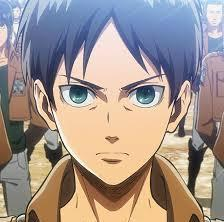

In [43]:
img = Image.fromarray(img)
display(img)

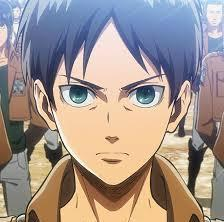

In [44]:
im = Image.fromarray(im)
display(im)